## Regulation of ion transport from within ion transit pathways
-------------

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

### Detail

<img src = "img/hill2019.png" height=500px width=500px> <img>

In [82]:
Ni = 100
Ci = 2
F_3n = Ni**2.5/(Ni**2.5 + 17**2.5)
K_con1 = 0.1
K_con2 = 20
K_coff1 = 0.05
K_coff2 = 0.3
K_12 = 0.2
K_43 = 0.1
K_inact1 = 0.2
K_inact2 = 25*K_inact1

In [83]:
k = {"Ni": Ni,"Ci":Ci, "F_3n": F_3n,\
     "K_con1": K_con1,"K_con2":K_con2,\
     "K_coff1":K_coff1,"K_coff2": K_coff2,\
     "K_12": K_12,"K_43":K_43,"K_inact1": K_inact1,\
     "K_inact2": K_inact2}

In [84]:
k

{'Ni': 100,
 'Ci': 2,
 'F_3n': 0.9882245384948204,
 'K_con1': 0.1,
 'K_con2': 20,
 'K_coff1': 0.05,
 'K_coff2': 0.3,
 'K_12': 0.2,
 'K_43': 0.1,
 'K_inact1': 0.2,
 'K_inact2': 5.0}

#### Differential Equations

$F_{3n} = \frac{Ni^{2.5}}{Ni^{2.5} + 17^{2.5}}$

$\frac{dF_{1}}{dt} = F_4C_iK_{con1} - F_{1}K_{coff1} + F_{2}F_{3n} K_{inact1} - F_1K_{12}$

$\frac{dF_{2}}{dt} = F_3 C_i K_{con2} - F_{2} K_{con2} + F_{1} K_{12} - F_{2} F_{3n} K_{inact1}$

$\frac{dF_{3}}{dt} = F_2 K_{coff2} + F_{4} K_{43} - F_{3}C_{i}K_{con2} - F_{3}F_{3n}K_{inact2}$

$F_{4} = 1 - F_{1} -F_{2} - F_{3}$

#### Reduced Equation

$\frac{dF_{1}}{dt} = C_iK_{con1} - F_{1}(K_{coff1}+C_iK_{con1} + K_{12}) + F_{2}(F_{3n} K_{inact1}- C_iK_{con1}) - F_{3}C_iK_{con1}$


$\frac{dF_{2}}{dt} = F_{1} K_{12} - F_{2} (K_{con2}+F_{3n} K_{inact1})+ F_3 C_i K_{con2}$

$\frac{dF_{3}}{dt} =  K_{43} - F_{1}K_{43} + F_2 (K_{coff2} - K_{43}) - F_{3}(C_{i}K_{con2} + F_{3n}K_{inact2} + K_{43}) $

### Calculation

In [85]:
# function that returns dy/dt
def model(y,t,k):
    
    '''y[0] = F1,
       y[1] = F2,
       y[2] = F3,
    '''
    
    dy1dt = k["Ci"]*k["K_con1"] \
           - y[0]*(k["K_coff1"]+k["Ci"]*k["K_con1"]+k["K_12"])\
           + y[1]*(k["F_3n"]*k["K_inact1"]-k["Ci"]*k["K_con1"])\
           - y[2]*k["Ci"]*k["K_con1"]
    
    dy2dt = y[0]*k["K_12"] \
           -y[1]*(k["K_con2"]+k["F_3n"]*k["K_inact1"])\
           +y[2]*k["Ci"]*k["K_con2"]
    
    dy3dt = k["K_43"]\
           -y[0]*k["K_43"]\
           +y[1]*(k["K_coff2"]-k["K_43"])\
           -y[2]*(k["Ci"]*k["K_con2"]+k["F_3n"]*k["K_inact2"]+k["K_43"])
    
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

In [86]:
N = 1
T = 30
y0 = [1,0,0]
t = np.linspace(0,T)

'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))

y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
y4 = np.empty_like(t)
I =  np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]
    y4[i] = 1 - y1[i] - y2[i] - y3[i] 
    I[i] = y2[i]*F_3n

In [87]:
y1[T-1],y2[T-1],y3[T-1],y4[T-1],I[T-1]

(0.4440358483443746,
 0.006902157651404237,
 0.0012649919244240608,
 0.5477970020797971,
 0.006820881559677445)

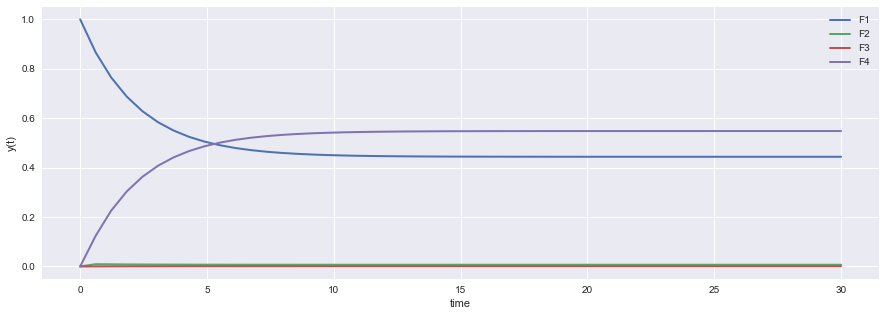

In [88]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,linewidth=2,label='F1')
plt.plot(t,y2,linewidth=2,label='F2')
plt.plot(t,y3,linewidth=2,label='F3')
plt.plot(t,y4,linewidth=2,label='F4')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

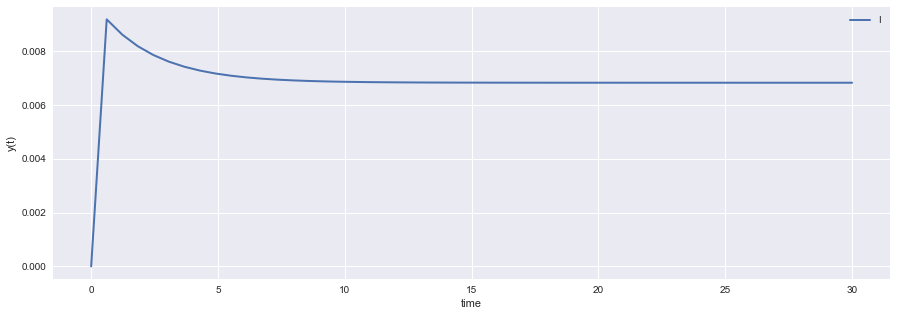

In [89]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,I,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Simulation

In [90]:
PTC = [{"Ni":0,"Ci": 2},\
       {"Ni":100,"Ci": 2},\
       {"Ni":0,"Ci": 0},\
       {"Ni":100,"Ci": 0},\
       {"Ni":100,"Ci": 2},\
       {"Ni":100,"Ci": 0},\
       {"Ni":100,"Ci": 2},\
       {"Ni":100,"Ci": 0},\
       {"Ni":0,"Ci": 2},\
       {"Ni":100,"Ci": 0},\
       {"Ni":0,"Ci": 0},\
       {"Ni":100,"Ci": 0},\
       {"Ni":0,"Ci": 0},\
       {"Ni":100,"Ci": 2},\
       {"Ni":0,"Ci": 0}]

In [91]:
PTCt = [{"Ni":0,"Ci": 0},\
       {"Ni":100,"Ci": 2},\
       {"Ni":0,"Ci": 0}]

In [92]:
len(PTC)

15

In [93]:
Tc = 30
TT = [i*Tc for i in range(len(PTCt))]

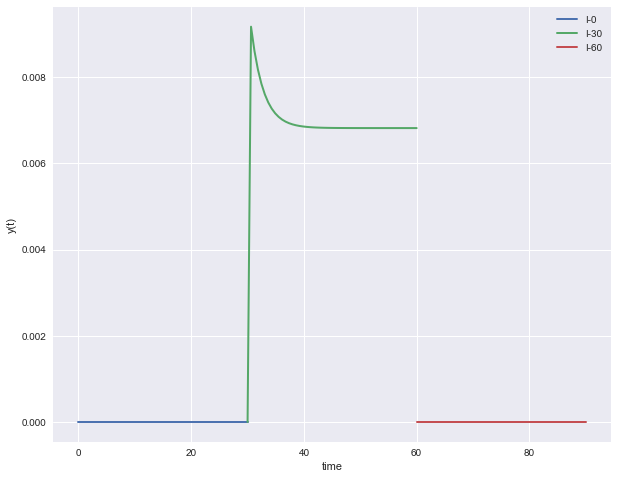

In [94]:
plt.figure(figsize = [10,8])
for i,T in enumerate(TT):
    
    ptc = PTCt[i]
    Ni = ptc['Ni']
    Ci = ptc['Ci']
    
    F_3n = Ni**2.5/(Ni**2.5 + 17**2.5)
    K_con1 = 0.1
    K_con2 = 20
    K_coff1 = 0.05
    K_coff2 = 0.3
    K_12 = 0.2
    K_43 = 0.1
    K_inact1 = 0.2
    K_inact2 = 25*K_inact1
        
    k = {"Ni": Ni,"Ci":Ci, "F_3n": F_3n,\
     "K_con1": K_con1,"K_con2":K_con2,\
     "K_coff1":K_coff1,"K_coff2": K_coff2,\
     "K_12": K_12,"K_43":K_43,"K_inact1": K_inact1,\
     "K_inact2": K_inact2}

    y0 = [1,0,0]
    t = np.linspace(T,T+Tc)
    '''solve ODEs'''
    y = odeint(model,y0,t,args=(k,))

    y1 = np.empty_like(t)
    y2 = np.empty_like(t)
    y3 = np.empty_like(t)
    y4 = np.empty_like(t)
    I =  np.empty_like(t)
    for i in range(len(t)):
        y1[i] = y[i][0]
        y2[i] = y[i][1]
        y3[i] = y[i][2]
        y4[i] = 1 - y1[i] - y2[i] - y3[i] 
        I[i] = y2[i]*F_3n
        
    y0 = [y1[Tc-1],y2[Tc-1],y3[Tc-1]]
        
    '''Plot the simulation'''
    plt.plot(t,I,linewidth=2,label='I-'+str(T))
    plt.xlabel('time')
    plt.ylabel('y(t)')
    plt.legend()
plt.show()